In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from carga import *
from tratamentos import *
from categorizacao import *

pfEnade = doCarga('microdados_enade_2019.txt')

# MOSTRAR - Head
# pfEnade.head()
# MOSTRAR - o tipo de dados
# pfEnade.info()

# TRATAMENTOS 
pfEnade = doIdade(pfEnade)
# pfEnade.groupby("Tempo").count()
pfEnade = doVazios(pfEnade)
pfEnade = doPublicoPrivada(pfEnade)
#pfEnade.groupby("Publica").count()
pfEnade = doHumanasExatas(pfEnade)
#pfEnade['Exatas'].value_counts()

pfEnade = doMigracao(pfEnade)

# TRATAMENTOS - Dicionários
pfEnade = doRenda(pfEnade)
#pfEnade['Renda'].value_counts().sort_index()
# pfEnade.isna().sum()    # Mostra se há vazios
pfEnade = doEscolaridade(pfEnade)
 

In [ ]:
pfEnade.head

In [ ]:
pfEnade['Migrado'].value_counts().sort_index()

In [ ]:
# VISUALIZAR - Renda
pfEnade.filter(items=['QE_I08', 'RendaDesc']).groupby('RendaDesc').count() #.sort_values(by='QE_I08', ascending=False)
renda = pfEnade.filter(items=['QE_I08', 'RendaDesc']).groupby('RendaDesc').count() #.sort_values(by='QE_I08', ascending=False)
renda.plot()

In [ ]:
# TRATAR - BOXPLOT - Tempo - Retirar outliers
pfEnade = pfEnade.query('Tempo < 7')
# stats.skew(pfEnade.Tempo)   # Pearson
fig = px.box(pfEnade, y='Tempo')
fig.update_layout(width=500, height=500)
fig.show()

In [ ]:
# PERCENTUAL - Renda
distRenda = pfEnade['Renda'].value_counts()

percentRenda = [100*x/distRenda.sum() for x in distRenda]
percentRenda

In [ ]:
# PERCENTUAL - Escolaridade do Pai
distEscolaridade = pfEnade['EPai'].value_counts()

percentEscolaridade = [100*x/distEscolaridade.sum() for x in distEscolaridade]
percentEscolaridade

In [ ]:
# HISTOGRAMA - Renda
pfEnade['Renda'].hist(bins=5)

Text(0, 0.5, '')

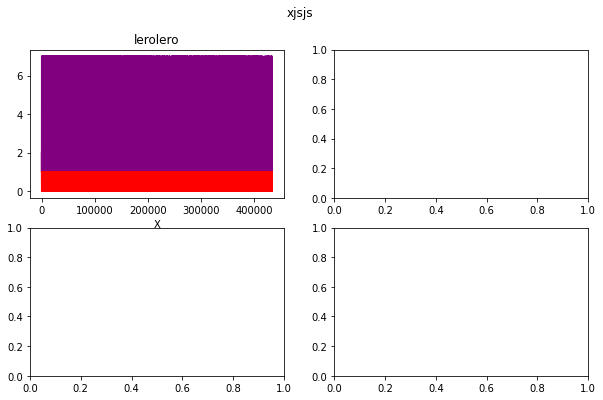

In [42]:
# HISTOGRAMA COMPARATIVO - Comparativo de Escolaridade do Pai
cols = ['Renda',  'Migrado', 'RendaDesc','Publica']
pfTemp = pfEnade.filter(items=cols)
#pfTemp.groupby('Renda').hist()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
fig.suptitle("Título 1", size=30)
plt.suptitle('xjsjs')

ax[0, 0].plot(pfTemp['Renda'], label='Renda', color='purple')
ax[0, 0].plot(pfTemp['Migrado'], label='Migrado', color='red')
ax[0, 0].set_title("lerolero")
ax[0, 0].set_xlabel("X")
ax[0, 0].set_ylabel("")
#ax[0, 1].plot(pfTemp['Renda', 'Publica'])
#ax[1, 0].plot(pfTemp['Publica', 'Migrado'])
#pfTemp.filter(items=cols).groupby(['Renda']).mean().sort_values(by='Renda', ascending=False).plot(ax=ax, ) # .unstack()


In [ ]:
pfEnade['EscolaridadeDesc']

In [ ]:
# HISTOGRAMA
pfEnade.groupby('Renda').hist()

In [ ]:
# PLOT - Comparativo de Reda
pfEnade.groupby('Migrado').hist()

In [ ]:
pfEnade.plot.scatter('Publica','Renda')

In [ ]:
pfEnade.dtypes

In [ ]:
pfEnade.filter(items=['Publica','Migrado', 'QE_I08']).groupby('QE_I08').mean()


In [ ]:
# DISTRIBUIÇÃO
distrib = pfEnade.filter(items=['Migrado', 'QE_I08']).groupby('QE_I08').count()
distrib.plot()